In [2]:
%%javascript 
// Notebook style configuration
require.config({paths: {toc: "//rawgit.com/rweigel/js-rsw/master/jupyter/toc"}});require(["toc"]);

<IPython.core.display.Javascript object>

The Heliophysics Application Programmer’s Interface (HAPI) data access specification is a RESTful API and streaming format specification for delivering digital time series data.

This notebook demonstrates the features of a Python client that accesses data from HAPI-compliant data servers.

To use this notebook locally

1. [Install Anaconda](https://www.anaconda.com/download/) for Python 3
2. On command line enter 

```bash
pip install hapiclient # Install hapiclient package
curl -L -O https://rawgithub.com/hapi-server/client-python/master/hapi_demo.ipynb
jupyter-notebook hapi_demo.ipynb # Launches browser window
```

To test code in this notebook, click on a code area, edit, and hit `SHIFT-ENTER` to execute.

For more information on HAPI-related software, see http://hapi-server.org/.

# Display documentation

In [4]:
from hapiclient.hapi import hapi
help(hapi)

Help on function hapi in module hapiclient.hapi:

hapi(*args, **kwargs)
    Request data from a HAPI server.
    
    For additional documentation and demonstration, see
    https://github.com/hapi-server/client-python/blob/master/hapi_demo.ipynb
    
    Version: 0.0.6
    
    Parameters
    ----------
    server : str
        A string with the url to the HAPI compliant server. A HAPI URL
        always ends with "/hapi".
    dataset : str
        A string specifying a dataset from a server
    parameters: str
        Comma-separated list of parameters in dataset
    start_time: str
        The start time of the requested data
    end_time: str
        The end time of the requested data; end times are exclusive - the
        last data record returned by a HAPI server should be before the
        given end_time.
    options : dict
        The following options are available.
            logging (False) - Log to console
            cache (True) - Save responses and processed responses 

# Examples
## SSCWeb data

Running hapi.py version 0.0.6
Writing /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSEY_GSEZ_GSE.json ... Done.
Saving http://hapi-server.org/servers/SSCWeb/hapi/data?id=ace&parameters=X_GSE,Y_GSE,Z_GSE&time.min=2001-01-01T05:00:00&time.max=2001-01-01T06:00:00&format=binary ... Done.
Reading /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.bin ... Done.
Writing /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.npy ... Done.
Writing /Users/robertweigel/git/client-python/hapi-data/hapi-server.org_servers_SSCWeb_hapi/ace_X_GSEY_GSEZ_GSE.pkl ... Done.


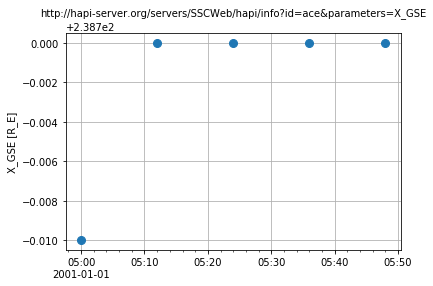

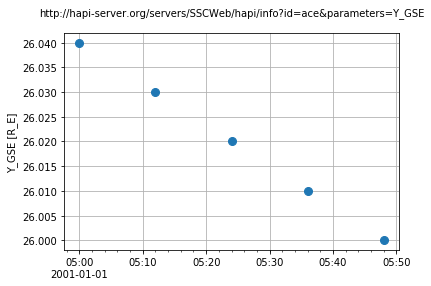

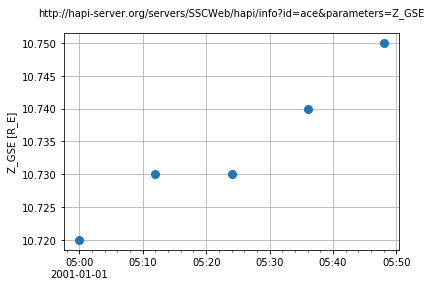

In [8]:
from hapiclient.hapi import hapi
from hapiclient.hapiplot import hapiplot
%matplotlib inline

server     = 'http://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'ace'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'X_GSE,Y_GSE,Z_GSE'
opts       = {'logging': True, 'use_cache': False}
data,meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data,meta)

## CDAWeb data

Running hapi.py version 0.0.6
Reading /Users/robertweigel/git/client-python/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_MagnitudeBGSEc.pkl ... Done.
Reading /Users/robertweigel/git/client-python/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.npy ... Done.


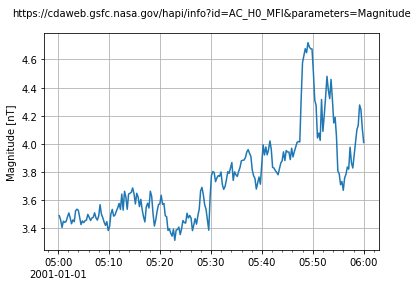

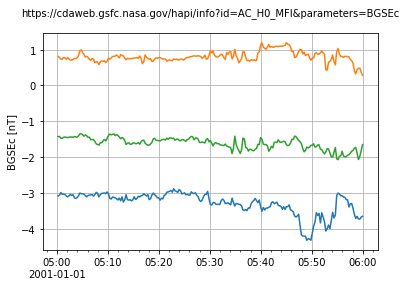

In [6]:
from hapiclient.hapi import hapi
from hapiclient.hapiplot import hapiplot
%matplotlib inline

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True, 'use_cache': True}    
data,meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data,meta)

# Data Model

A request for data of the form
```
data,meta = hapi(server,dataset,parameters,start,stop)
```
returns the [Numpy N-D array](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html) `data` and a Python dictionary `meta` from a HAPI-compliant data server `server`.

The basic data structure returned by all HAPI servers is a CSV file in which the first column is a time stamp and subsequent columns are data measured or associated with that time stamp. The columns are mapped to one or more parameters (that may be multi-dimensional arrays) using the metadata associated with the request for CSV data.

For more information on the HAPI server specification, see https://github.com/hapi-server/data-specification.

## Extracting Data

In [122]:
from hapiclient.hapi import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

`data` is a Numpy N-D array with named fields `Time`, `scalar`, and `vector`. The array has 10 elements (one for each time value) and each element is a list.

In [123]:
data

array([(b'1970-01-01T00:00:00.000Z', 0.        , [ 0.        , -0.70710678, -1.        ]),
       (b'1970-01-01T00:00:01.000Z', 0.00523596, [ 0.00523596, -0.7033947 , -0.99998629]),
       (b'1970-01-01T00:00:02.000Z', 0.01047178, [ 0.01047178, -0.69966334, -0.99994517]),
       (b'1970-01-01T00:00:03.000Z', 0.01570732, [ 0.01570732, -0.6959128 , -0.99987663]),
       (b'1970-01-01T00:00:04.000Z', 0.02094242, [ 0.02094242, -0.69214317, -0.99978068]),
       (b'1970-01-01T00:00:05.000Z', 0.02617695, [ 0.02617695, -0.68835458, -0.99965732]),
       (b'1970-01-01T00:00:06.000Z', 0.03141076, [ 0.03141076, -0.68454711, -0.99950656]),
       (b'1970-01-01T00:00:07.000Z', 0.03664371, [ 0.03664371, -0.68072087, -0.99932839]),
       (b'1970-01-01T00:00:08.000Z', 0.04187565, [ 0.04187565, -0.67687597, -0.99912283]),
       (b'1970-01-01T00:00:09.000Z', 0.04710645, [ 0.04710645, -0.67301251, -0.99888987])],
      dtype=[('Time', 'S24'), ('scalar', '<f8'), ('vector', '<f8', (3,))])

Access first element (all parameters at first time)

In [124]:
data[0]

(b'1970-01-01T00:00:00.000Z', 0., [ 0.        , -0.70710678, -1.        ])

Access all time values as Numpy array.

In [125]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

Access all values for parameter `vector`

In [126]:
data['vector']

array([[ 0.        , -0.70710678, -1.        ],
       [ 0.00523596, -0.7033947 , -0.99998629],
       [ 0.01047178, -0.69966334, -0.99994517],
       [ 0.01570732, -0.6959128 , -0.99987663],
       [ 0.02094242, -0.69214317, -0.99978068],
       [ 0.02617695, -0.68835458, -0.99965732],
       [ 0.03141076, -0.68454711, -0.99950656],
       [ 0.03664371, -0.68072087, -0.99932839],
       [ 0.04187565, -0.67687597, -0.99912283],
       [ 0.04710645, -0.67301251, -0.99888987]])

Access value of `vector` at second timestep.

In [127]:
data['vector'][1] 

array([ 0.00523596, -0.7033947 , -0.99998629])

Access value of second component of `vector` at second timestep

In [128]:
data['vector'][1,1]

-0.7033947028105039

## Time Representation

A HAPI-compliant server represents time as an ISO 8601 string (with several constraints - see the [HAPI specification](https://github.com/hapi-server/data-specification/blob/master/hapi-dev/HAPI-data-access-spec-dev.md#representation-of-time). `hapi.py` reads these into a NumPy array of [Python byte literals](https://stackoverflow.com/a/6273618). To convert byte literals to Python `datetime` objects, the function [`hapitime2datetime`](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapi.py) can be used. Internally, this function uses `pandas.to_datetime` for parsing if possible. Otherwise it falls back to a manual method for parsing.

In [129]:
from hapiclient.hapi import hapi
from hapiclient.hapi import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

In [130]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

In [131]:
hapitime2datetime(data['Time'])

array([datetime.datetime(1970, 1, 1, 0, 0),
       datetime.datetime(1970, 1, 1, 0, 0, 1),
       datetime.datetime(1970, 1, 1, 0, 0, 2),
       datetime.datetime(1970, 1, 1, 0, 0, 3),
       datetime.datetime(1970, 1, 1, 0, 0, 4),
       datetime.datetime(1970, 1, 1, 0, 0, 5),
       datetime.datetime(1970, 1, 1, 0, 0, 6),
       datetime.datetime(1970, 1, 1, 0, 0, 7),
       datetime.datetime(1970, 1, 1, 0, 0, 8),
       datetime.datetime(1970, 1, 1, 0, 0, 9)], dtype=object)

## Generating Data

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.
1970-01-01T00:00:02.000Z, 4.,5.,6.
```

where the metadata indicates there is one parameter named `vector` with `size=[3]` and `type=double` could be created by

In [132]:
import numpy as np
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])
# Populate
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
# or populate by record
data[0] = (b'1970-01-01T00:00:00.000Z', [1.0,2.0,3.0])
data[1] = (b'1970-01-01T00:00:01.000Z', [4.0,5.0,6.0])
data

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 11.,12.,13.,14.,15.,16.,17.,18.,19.
```
where the metadata indicates there is one parameter named `matrix` with `size=[3,3]` and `type=double` could be created by

In [133]:
import numpy as np
# Allocate
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('matrix', '<f8', (3,3,))])
# Populate
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )
data

array([(b'1970-01-01T00:00:00.000Z', [[ 1.,  2.,  3.], [ 4.,  5.,  6.], [ 7.,  8.,  9.]]),
       (b'1970-01-01T00:00:01.000Z', [[11., 12., 13.], [14., 15., 16.], [17., 18., 19.]])],
      dtype=[('Time', 'S24'), ('matrix', '<f8', (3, 3))])

Multiple parameters, e.g. a response with both the vector and matrix parameters considered above

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,  1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 4.,5.,6., 11.,12.,13.,14.,15.,16.,17.,18.,19.
```

can be created by populating

In [134]:
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3,3,))])
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )
data

array([(b'1970-01-01T00:00:00.000Z', [1., 2., 3.], [[ 1.,  2.,  3.], [ 4.,  5.,  6.], [ 7.,  8.,  9.]]),
       (b'1970-01-01T00:00:01.000Z', [4., 5., 6.], [[11., 12., 13.], [14., 15., 16.], [17., 18., 19.]])],
      dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3, 3))])

# Plotting

In [135]:
# Get data for use below
from hapiclient.hapi import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

## hapiplot
The HAPI Python client package comes with a simple plotting function `hapiplot` that plots all of the requested variables. In the following we compare the plots generated by `hapiplot` with those generated by a few MatplotLib commands. Interally, `hapiplot` uses MatplotLib and uses `hapi.util.datetick` to generate better axis labels. It also plots all of the parameters returned by a call to `hapi`.

See also [the following subsection](#Pandas) for an example of using Pandas for plotting.

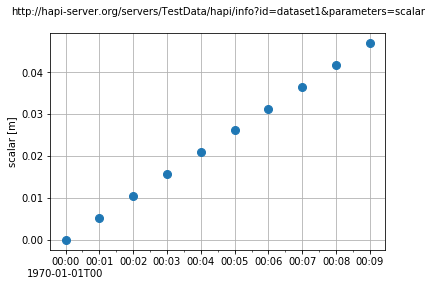

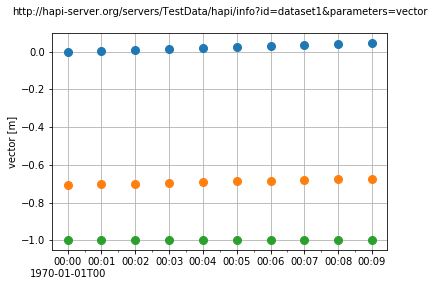

In [136]:
from hapiclient.hapiplot import hapiplot
hapiplot(data,meta)

## MatplotLib

Text(0.5,1,'scalar with Time as datetimes')

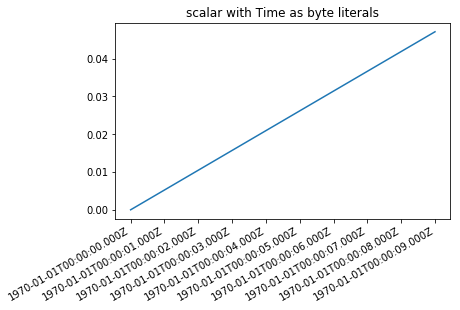

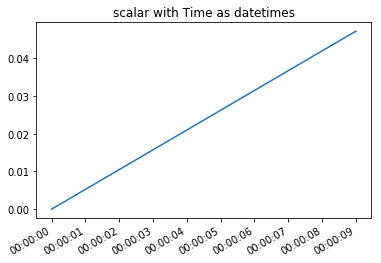

In [137]:
from matplotlib import pyplot as plt
from hapiclient.hapi import hapitime2datetime

# Use byte literal time stamps
plt.plot(data['Time'],data['scalar'])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as byte literals')

# Convert data['Time'] to datetimes.
# Note the difference in tick labels when datetimes are used.
plt.figure()
plt.plot(hapitime2datetime(data['Time']),data['scalar'])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes')

## Pandas

In [138]:
import pandas
df = pandas.DataFrame(data['vector'])
df['Time'] = hapitime2datetime(data['Time'])
df.set_index('Time', inplace=True)
df.columns = ['x', 'y', 'z']

In [139]:
display(df)

,x,y,z
Time,,,
1970-01-01 00:00:00,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08,0.041876,-0.676876,-0.999123


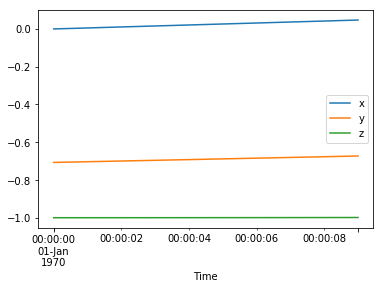

In [140]:
df.plot()

# Metadata

The metadata returned by `hapi()` is a straightforward mapping of the JSON metadata from a HAPI server.

## Servers

Equivalent URL: https://github.com/hapi-server/data-specification/blob/master/servers.txt

In [141]:
from hapiclient.hapi import hapi

servers = hapi() # servers is an array of URLs
display(servers)

['http://hapi-server.org/servers/TestData/hapi',
 'http://hapi-server.org/servers/SSCWeb/hapi',
 'http://datashop.elasticbeanstalk.com/hapi',
 'https://cdaweb.gsfc.nasa.gov/hapi',
 'http://planet.physics.uiowa.edu/das/das2Server/hapi',
 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi']

## Server datasets

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/catalog

In [142]:
from hapiclient.hapi import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server)

display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'catalog': [{'id': 'A1_K0_MPA'},
  {'id': 'A2_K0_MPA'},
  {'id': 'AC_AT_DEF'},
  {'id': 'AC_H0_MFI'},
  {'id': 'AC_H0_SWE'},
  {'id': 'AC_H1_EPM'},
  {'id': 'AC_H1_MFI'},
  {'id': 'AC_H1_SIS'},
  {'id': 'AC_H2_CRIS'},
  {'id': 'AC_H2_EPM'},
  {'id': 'AC_H2_MFI'},
  {'id': 'AC_H2_SEP'},
  {'id': 'AC_H2_SIS'},
  {'id': 'AC_H2_SWE'},
  {'id': 'AC_H2_SWI'},
  {'id': 'AC_H2_ULE'},
  {'id': 'AC_H3_CRIS'},
  {'id': 'AC_H3_EPM'},
  {'id': 'AC_H3_MFI'},
  {'id': 'AC_H3_SW2'},
  {'id': 'AC_H3_SWI'},
  {'id': 'AC_H4_SWI'},
  {'id': 'AC_H5_SWI'},
  {'id': 'AC_H6_SWI'},
  {'id': 'AC_K0_EPM'},
  {'id': 'AC_K0_MFI'},
  {'id': 'AC_K0_SIS'},
  {'id': 'AC_K0_SWE'},
  {'id': 'AC_K1_EPM'},
  {'id': 'AC_K1_MFI'},
  {'id': 'AC_K1_SWE'},
  {'id': 'AC_K2_MFI'},
  {'id': 'AC_OR_DEF'},
  {'id': 'AC_OR_SSC'},
  {'id': 'BAR_1A_L2_EPHM'},
  {'id': 'BAR_1A_L2_FSPC'},
  {'id': 'BAR_1A_L2_MAGN'},
  {'id': 'BAR_1A_L2_MSPC'},
  {'id': 'BAR_1A_L2_RCNT'},
  {'i

## Dataset  parameters

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI

In [143]:
from hapiclient.hapi import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
meta = hapi(server,dataset)
display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude'},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3]},
  {'name': 'BGSM',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic field vector in GSM coordinates (16 sec)',
   'size': [3]},
  {'name': 'dBrms',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'RMS of Magnetic Field (16 sec period)'},
  {'name': 'SC_pos_GSE',
   'type': 'double',
   'units': 'km',
   'fill': '-1.0E31',
   'description': 'ACE s/c position, 3 comp. in GSE coord.',
   'size': [3]},
  {'name': 'SC_pos_GSM',
   'type': 'double',
   'unit

## Parameters

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc

(Except for the addition of internal keys that prefixed by `x_`.)

In [144]:
from hapiclient.hapi import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'Magnitude,BGSEc'

meta = hapi(server,dataset,parameters)

display(meta)

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude'},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3]}],
 'startDate': '1997-09-02T00:00:12Z',
 'stopDate': '2018-08-10T23:59:51Z',
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'AC_H0_MFI',
 'x_parameters': 'Magnitude,BGSEc',
 'x_metaFile': '/Users/robertweigel/git/client-python/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_MagnitudeBGSEc.json',
 'x_requestDate': '2018-10-04T09:52:27',
 'x_cacheDir': '/Users/robertweigel/git/client-python/hapi-data/cdaweb.gsfc.nasa.gov_hapi'}